<a href="https://colab.research.google.com/github/manisharathorgithub/ShadowFox/blob/main/BostonHousePricePrediction_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Boston House Price Prediction
#### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Loading Dataset

In [ ]:
data = pd.read_csv('/content/HousingData.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Handle Null Values


In [ ]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
data.isnull().sum().sum()

120

In [ ]:
data = data.dropna()
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


## Understand the Correlation between data

In [ ]:
correlation=data.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


<Axes: >

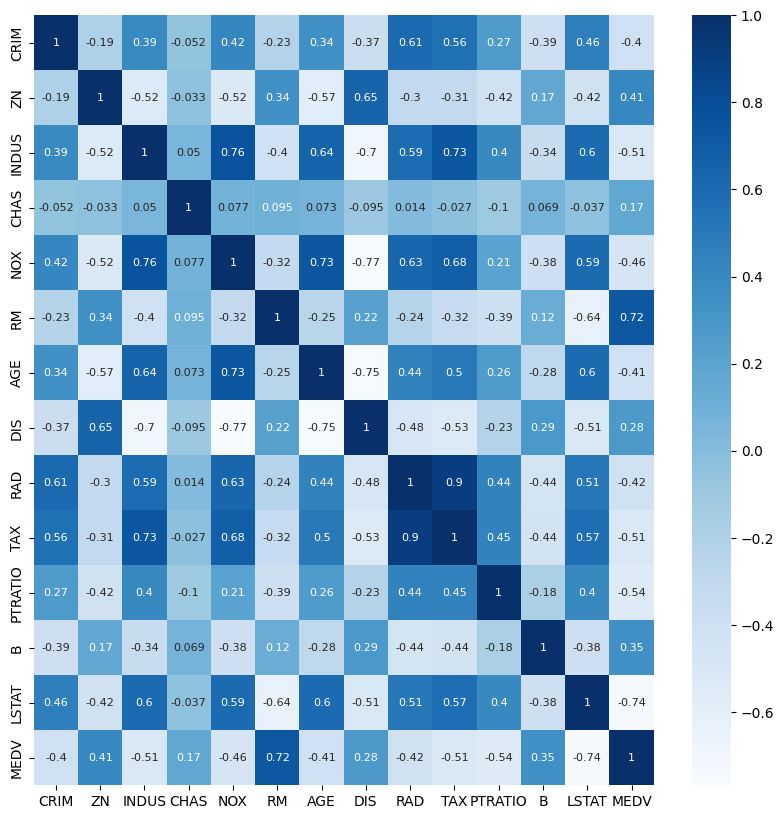

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot = True, annot_kws= {'size':8} , cmap='Blues')

## Splitting the data

In [ ]:
features = data.drop(['MEDV'], axis = 1)
actual_val = data['MEDV']

In [ ]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [ ]:
actual_val

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [ ]:
features_train, features_test, actual_val_train, actual_val_test = train_test_split(features, actual_val, test_size = 0.2, random_state = 2)

In [ ]:
print(f"Features size: {features.shape}, Features_train size: {features_train.shape}, Features_test size: {features_test.shape}")
print(f"Actual_val size: {actual_val.shape}, Actual_val_train size: {actual_val_train.shape}, Actual_val_test size: {actual_val_test.shape}")

Features size: (394, 13), Features_train size: (315, 13), Features_test size: (79, 13)
Actual_val size: (394,), Actual_val_train size: (315,), Actual_val_test size: (79,)


## Model Training


1.   Linear Regression
2.   Random Forest
3.   Decision Tree
4.   XGBoost Regression





In [ ]:
# Model 1: Linear Regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(features_train, actual_val_train)

# Predicting the model
pred1 = model1.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model1.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred1))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred1))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred1)))

Accuracy:  0.7605719989452937
Mean Absolute Error:  3.1814653606882195
Mean Squared Error:  17.620171440951566
Root Mean Squared Error:  4.197638793530426


In [ ]:
# Model 2: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(features_train, actual_val_train)

# Predicting the mdoel
pred2 = model2.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model2.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred2))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred2))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred2)))

Accuracy:  0.8694218551893682
Mean Absolute Error:  2.200392405063291
Mean Squared Error:  9.609608265822782
Root Mean Squared Error:  3.099936816424293


In [ ]:
# Model 3: Decision Tree
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(features_train, actual_val_train)

# Predicting the model
pred3 = model3.predict(features_test)

#Measuring Accuracy
print("Accuracy: ", model3.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred3))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred3))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred3)))

Accuracy:  0.8215513503246253
Mean Absolute Error:  2.720253164556962
Mean Squared Error:  13.132531645569621
Root Mean Squared Error:  3.623883503311002


In [ ]:
# Model 4: XGBoost Regression
from xgboost import XGBRegressor
model4 = XGBRegressor()
model4.fit(features_train, actual_val_train)

# Predicting the model
pred4 = model4.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model4.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred4))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred4))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred4)))

Accuracy:  0.8470798633773929
Mean Absolute Error:  2.254431766799734
Mean Squared Error:  11.253817482477404
Root Mean Squared Error:  3.3546709946695823


In [ ]:
# Model 5: Extra Tree Regressor
from sklearn.ensemble import ExtraTreesRegressor
model5 = ExtraTreesRegressor()
model5.fit(features_train, actual_val_train)

# Predicting the model
pred5 = model5.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model5.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred5))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred5))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred5)))


Accuracy:  0.8451329187442461
Mean Absolute Error:  2.212772151898731
Mean Squared Error:  11.39709854430379
Root Mean Squared Error:  3.3759589073778415


In [ ]:
# Model 6: Hist Gradient Boosting Regressor
from sklearn.ensemble import HistGradientBoostingRegressor
model6 = HistGradientBoostingRegressor()
model6.fit(features_train, actual_val_train)

# Predicting the model
pred6 = model6.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model6.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred6))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred6))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred6)))



Accuracy:  0.8641784366655618
Mean Absolute Error:  2.277479232706549
Mean Squared Error:  9.99548599490686
Root Mean Squared Error:  3.1615638527328307


In [ ]:
# Model 7: Lasso Regression.
from sklearn.linear_model import Lasso
model7 = Lasso()
model7.fit(features_train, actual_val_train)

# Predicting the model
pred7 = model7.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model7.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred7))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred7))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred7)))




Accuracy:  0.7780261643550825
Mean Absolute Error:  3.0277998905425605
Mean Squared Error:  16.335670941743302
Root Mean Squared Error:  4.041741078018643


In [ ]:
# Model 8: KNN Model.
from sklearn.neighbors import KNeighborsRegressor
model8 = KNeighborsRegressor()
model8.fit(features_train, actual_val_train)

# Predicting the model
pred8 = model8.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model8.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred8))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred8))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred8)))




Accuracy:  0.6785620832666728
Mean Absolute Error:  3.622025316455696
Mean Squared Error:  23.655508860759504
Root Mean Squared Error:  4.863692924184205


In [ ]:
# Model 9: GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
model9 = GradientBoostingRegressor()
model9.fit(features_train, actual_val_train)

# Predicting the model
pred9 = model9.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model9.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred9))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred9))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred9)))



Accuracy:  0.8996144223382265
Mean Absolute Error:  2.009823814285861
Mean Squared Error:  7.387653410660412
Root Mean Squared Error:  2.7180238061246653


In [ ]:
# Model 10: ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model10 = ExtraTreesRegressor()
model10.fit(features_train, actual_val_train)

# Predicting the model
pred10 = model10.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model10.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred10))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred10))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred10)))


Accuracy:  0.8304527084024796
Mean Absolute Error:  2.2206708860759488
Mean Squared Error:  12.477455987341767
Root Mean Squared Error:  3.532344262291229


In [ ]:
# Model 11: BaggingRegressor
from sklearn.ensemble import BaggingRegressor
model11 = BaggingRegressor()
model11.fit(features_train, actual_val_train)

# Predicting the model
pred11 = model11.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model11.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred11))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred11))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred11)))




Accuracy:  0.8526757071941864
Mean Absolute Error:  2.389493670886076
Mean Squared Error:  10.842003797468358
Root Mean Squared Error:  3.2927198176383543


In [ ]:
# Model 12: AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
model12 = AdaBoostRegressor()
model12.fit(features_train, actual_val_train)

# Predicting the model
pred12 = model12.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model12.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred12))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred12))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred12)))





Accuracy:  0.8686285592525674
Mean Absolute Error:  2.341763804353745
Mean Squared Error:  9.667989116634995
Root Mean Squared Error:  3.109339016034597


In [ ]:
# Model 13: Neural Network Regression
from sklearn.neural_network import MLPRegressor
model13 = MLPRegressor()
model13.fit(features_train, actual_val_train)

# Predicting the model
pred13 = model13.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model13.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred13))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred13))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred13)))



Accuracy:  0.6969615192999754
Mean Absolute Error:  3.5240786033318354
Mean Squared Error:  22.30144327154073
Root Mean Squared Error:  4.722440393646142


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Model 14: Ridge Regression.
from sklearn.linear_model import Ridge
model14 = Ridge()
model14.fit(features_train, actual_val_train)

# Predicting the model
pred14 = model14.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model14.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred14))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred14))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred14)))





Accuracy:  0.7713266859637979
Mean Absolute Error:  3.1158198649113547
Mean Squared Error:  16.828704159660088
Root Mean Squared Error:  4.102280360928551


In [ ]:
# Model 15: Lasso
from sklearn.linear_model import Lasso
model15 = Lasso()
model15.fit(features_train, actual_val_train)

# Predicting the model
pred15 = model15.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model15.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred15))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred15))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred15)))


Accuracy:  0.7780261643550825
Mean Absolute Error:  3.0277998905425605
Mean Squared Error:  16.335670941743302
Root Mean Squared Error:  4.041741078018643


In [ ]:
# Model 16: Elastic-Net
from sklearn.linear_model import ElasticNet
model16 = ElasticNet()
model16.fit(features_train, actual_val_train)

# Predicting the model
pred16 = model16.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model16.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred16))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred16))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred16)))




Accuracy:  0.7804533596043951
Mean Absolute Error:  3.0048010861467755
Mean Squared Error:  16.157046903514047
Root Mean Squared Error:  4.019582926562661


In [ ]:
# Model 17: MLPRegressor
from sklearn.neural_network import MLPRegressor
model17 = MLPRegressor()
model17.fit(features_train, actual_val_train)

# Predicting the model
pred17 = model17.predict(features_test)

# Measuring Accuracy
print("Accuracy: ", model17.score(features_test, actual_val_test))
print("Mean Absolute Error: ", metrics.mean_absolute_error(actual_val_test, pred17))
print("Mean Squared Error: ", metrics.mean_squared_error(actual_val_test, pred17))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(actual_val_test, pred17)))






Accuracy:  0.7520785393451992
Mean Absolute Error:  3.2007309583221164
Mean Squared Error:  18.245228717549164
Root Mean Squared Error:  4.271443399782931


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# prompt: # Comparing all models with respect to accuracies

import pandas as pd
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13, model14, model15, model16, model17]
# Add the missing model name to the list. You had two 'Lasso' entries
model_names = ["Linear Regression", "Random Forest", "Decision Tree", "XGBoost", "Extra Tree Regressor", "Hist Gradient Boosting", "Lasso", "KNN", "Gradient Boosting","Extra Tree Regressor", "Bagging Regressor", "AdaBoost Regressor", "Neural Network", "Ridge", "Lasso", "ElasticNet", "MLPRegressor"] # Replace "Missing Model Name" with the correct name
accuracies = []
for model in models:
  accuracies.append(model.score(features_test, actual_val_test))

comparison_df = pd.DataFrame({"Model": model_names, "Accuracy": accuracies})
comparison_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
8,Gradient Boosting,0.899614
1,Random Forest,0.869422
11,AdaBoost Regressor,0.868629
5,Hist Gradient Boosting,0.864178
10,Bagging Regressor,0.852676
3,XGBoost,0.847080
4,Extra Tree Regressor,0.845133
9,Extra Tree Regressor,0.830453
2,Decision Tree,0.821551
15,ElasticNet,0.780453


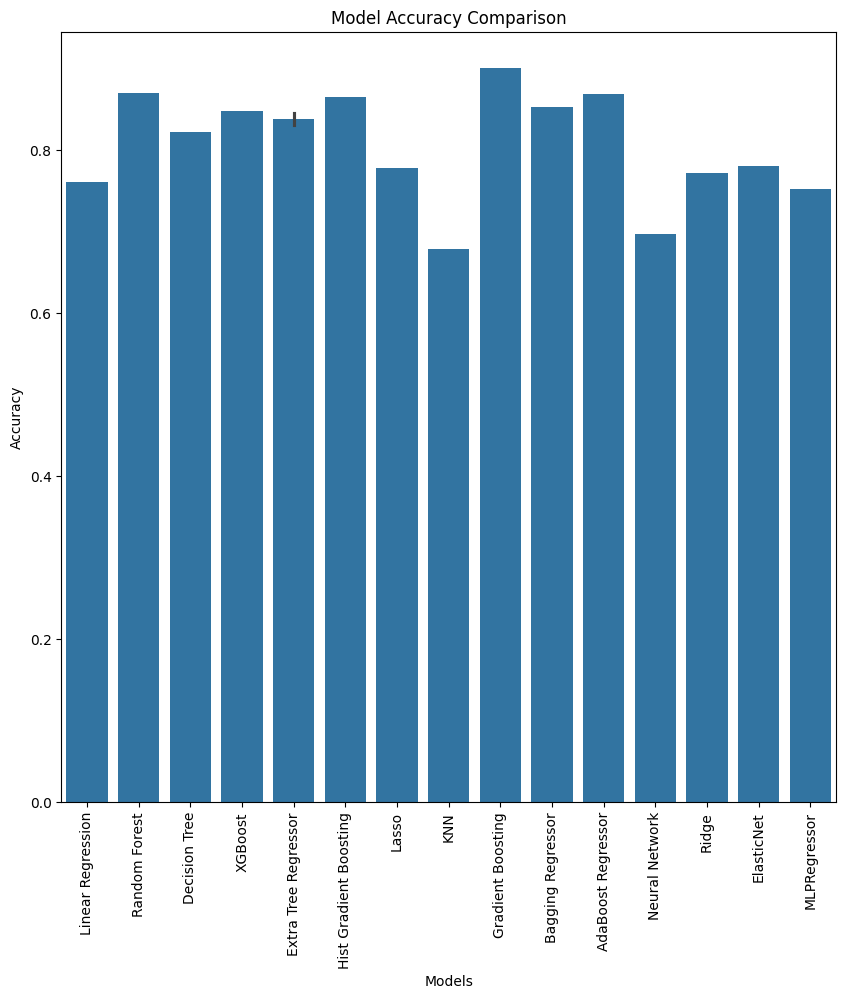

In [ ]:
# Plotting the graph for the accuracy of every model
plt.figure(figsize=(10, 10))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()
